<a href="https://colab.research.google.com/github/danielabebe1/CapstoneProject1/blob/master/Capstone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project I

## Predicting Pain Relievers Based on Age and Satisfaction Level

Both prescribed and non-prescribed use of pain relievers, as well as rates of opioid-related mortality and admissions to emergency departments, have increased in the last few years. There is no exact figure on how many people are affected by this problem but the number has increased according to ‘National Center for Biotechnology Information’. There are many different pain relievers, and each one has advantages and risks. Some types of pain respond better to certain medicines than others. Each person has a different response to a pain reliever for the same type of condition. This is mainly because the conditions that cause pain are very complicated, which is one of the reasons why pain management is so difficult. This difficulty decreases the quality of life of patients that, in many cases, can suffer from constant pain with little to no relief. General-purpose pain-relieving medication is often ineffective even the best painkiller like morphine can sometimes fail to inhibit pain in cancer patients. Painkillers are working by activating a receptor cell call REV_ERBs that sends chemical signals inside the cell to block the production of certain genes regulates pain-causing and inflammatory molecules inside the body. The goal of this project is to build a model that can predict painkiller selected conditions and for different age groups. 
The possible stakeholders of this project includes pharmaceutical companies, physicians and clinicians, insurance companies and patients. Knowing the consumers’ response for the product is crucial in many majors in addition to the available research and development in the field will help physicians and clinicians while subscribing to these drugs. Pharmaceutical companies and insurance companies will also identify their focus drugs for their consumers. 
The dataset used in this project was acquired from kaggle where uploaded on kaggle by scraping the WebMD site (https://www.kaggle.com/rohanharode07/webmd-drug-reviews-dataset). The dataset provides user reviews on specific drugs along with related conditions, side effects, age, sex, and ratings reflecting overall patient satisfaction. The dataset contains 12 features with mixed variables including categorical, numerical and date. There are above 360 thousands of rows of unique reviews and are updated till Mar 2020.


In [ ]:
#Importing the relevant libraries and load the data into the data frameles
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
from scipy.stats import ttest_ind
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing, metrics
from sklearn import utils
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_svmlight_file
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/webmd.csv'
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' '"
df=pd.read_csv(path, na_values=' ')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
df=df.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [ ]:
df=df[df.Condition.str.contains('Pain', na=False)]

#check the number of features and rows of remaining data
print("Dataset contains: " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns")

Dataset contains: 53649 rows and 7 columns


In [ ]:
df.Condition.value_counts().head(5)

Pain                                                         25232
Neuropathic Pain                                              8988
Disorder characterized by Stiff, Tender & Painful Muscles     3472
Chronic Pain                                                  2913
Joint Damage causing Pain and Loss of Function                2451
Name: Condition, dtype: int64

For this project let's use one condition that is frequently occured in the dataset. Looking at the value_counts() above the top condition is 'Pain' but it is very general so we chose Neuropathic Pain for our model. 

In [ ]:
df=df[df['Condition']=='Neuropathic Pain']
df.Drug.value_counts().head(20)

lyrica                                       1283
neurontin                                     790
neurontin capsule                             790
cymbalta                                      699
gabapentin                                    661
gabapentin solution                           661
gabapentin tablet, extended release 24 hr     661
oxycodone hcl er                              402
oxycodone hcl solution                        402
oxycodone hcl                                 402
oxycodone tablet, oral only                   402
tramadol hcl er                               327
tramadol hcl                                  327
amitriptyline hcl                             240
nortriptyline hcl                             218
oxycontin                                     105
ultram                                         88
pamelor                                        55
roxicodone                                     52
effexor xr                                     49


LWe merged drugs in one family for instance 'tramadol hcl' and 'tramadol hcl er' are the same chemical composition with minor difference.

In [ ]:
df.replace(to_replace=['gabapentin tablet, extended release 24 hr','gabapentin solution','neurontin capsule',
                       'oxycodone tablet, oral only', 'oxycodone hcl er','oxycodone hcl','oxycodone hcl solution',
                      'tramadol hcl','tramadol hcl er','methadone hcl','methadone hcl tablet, soluble','methadone hcl solution',
                     'morphine sulfate er tablet, extended release', 'morphine sulfate', 
                       'morphine sulfate er capsule, extended release multiphase 24 hr',
                       'morphine tablet,oral only, extended release','morphine sulfate er'], 
           value=['gabapentin','gabapentin','neurontin','oxycodone','oxycodone','oxycodone','oxycodone',
                 'tramadol','tramadol','methadone','methadone','methadone','morphine','morphine','morphine','morphine',
                  'morphine'], inplace=True)

In [ ]:
df.Drug.value_counts().head(7)

gabapentin           1983
oxycodone            1608
neurontin            1580
lyrica               1283
cymbalta              699
tramadol              654
amitriptyline hcl     240
Name: Drug, dtype: int64

In [ ]:
df.to_pickle("Neuropathic Pain.pkl")

In [ ]:
df=df[df['Drug'].isin(['gabapentin','oxycodone','neurontin','lyrica'])]

In [ ]:
df.Condition.value_counts()

Neuropathic Pain    6454
Name: Condition, dtype: int64

In [ ]:
df.isnull().sum()

Age              236
Condition          0
Drug               0
EaseofUse          0
Effectiveness      0
Satisfaction       0
Sex              426
dtype: int64

In [ ]:
df.fillna(method ='pad', inplace=True) 
df.dropna(inplace=True)
print('Do null values exist in the dataset? ' + str(df.isnull().values.any()))

Do null values exist in the dataset? False


In [ ]:
df.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
186,65-74,Neuropathic Pain,lyrica,5,5,5,Female
187,19-24,Neuropathic Pain,lyrica,1,3,1,Female
188,35-44,Neuropathic Pain,lyrica,5,5,5,Female
190,65-74,Neuropathic Pain,lyrica,3,3,2,Female
191,55-64,Neuropathic Pain,lyrica,2,2,1,Female


In [ ]:
import pickle
df.to_pickle("Neuropathic_Pain.pkl")

# Exploratory Data Analysis

In [ ]:
df.Drug.value_counts()

gabapentin    1983
oxycodone     1608
neurontin     1580
lyrica        1282
Name: Drug, dtype: int64

In [ ]:
# Feature engineering: discretization on age for age_group & age_bin_label
# before getting into grouping, lets replace the existing group to approximate age. 
df.replace(to_replace=['0-2', '3-6','7-12', '13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'], 
           value=[0,5,10,15,20,30,40,50,60,70,80], inplace=True)

age_bins = [0, 20, 30, 40, 50, 60, 70,80]
age_bin_labels = [1,2,3,4,5,6,7]
# Stratification: age_group #
###############################################################################
# Generate age_group and age_group_label
df['Age_group'] = pd.cut(np.array(df['Age']),bins=age_bins) 
df['Age_group_label'] = pd.cut(np.array(df['Age']),bins=age_bins, labels=age_bin_labels) 

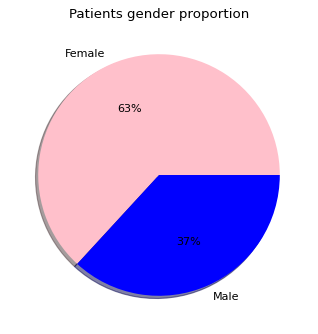

In [ ]:
# Count frequencies and shows patients breakdown by stroke condition:
df_sex = pd.DataFrame(df.groupby('Sex')['Sex'].count())
df_sex.columns = ['count']
plt.figure(figsize=(6,5), dpi= 80)
plt.pie(df_sex, labels=['Female','Male'], autopct='%.0f%%', colors=['pink','blue'], shadow=True)
plt.title('Patients gender proportion')
plt.show()

Text(0.5, 1.0, 'Age distribution')

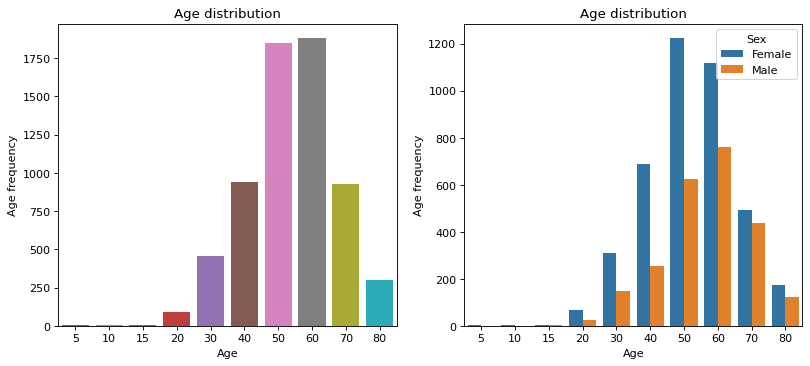

In [ ]:
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1, 2, 1)
sns.countplot(x="Age", data=df,);
plt.ylabel('Age frequency')
plt.title('Age distribution')
plt.subplot(1, 2, 2)
sns.countplot(x="Age", hue="Sex",data=df,);
plt.ylabel('Age frequency')
plt.title('Age distribution')
# plt.subplot(1, 3, 2)
# sns.countplot(x="Effectiveness", hue="Sex",data=df);
# plt.subplot(1, 3, 3)
# sns.countplot(x="Satisfaction", hue="Sex",data=df);

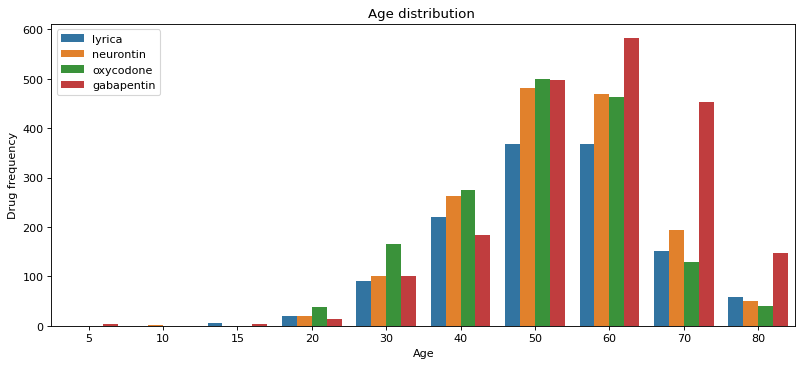

In [ ]:
plt.figure(figsize=(12,5), dpi= 80)

sns.countplot(x="Age", hue="Drug",data=df,);
plt.ylabel('Drug frequency')
plt.title('Age distribution ')
plt.legend(loc='upper left')

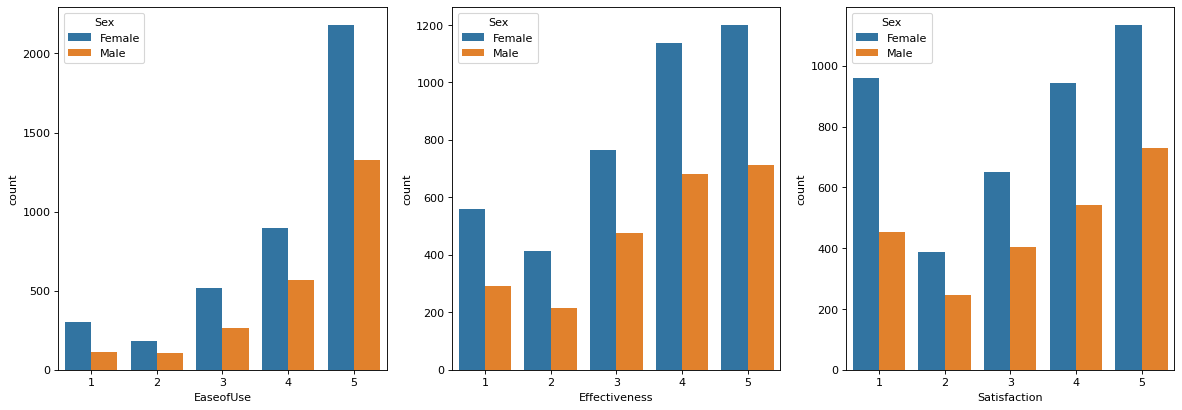

In [ ]:
plt.figure(figsize=(18,6), dpi= 80)
plt.subplot(1, 3, 1)
sns.countplot(x="EaseofUse", hue="Sex",data=df,);
plt.subplot(1, 3, 2)
sns.countplot(x="Effectiveness", hue="Sex",data=df);
plt.subplot(1, 3, 3)
sns.countplot(x="Satisfaction", hue="Sex",data=df);

Text(0.5, 1.0, 'Frequency of Drug')

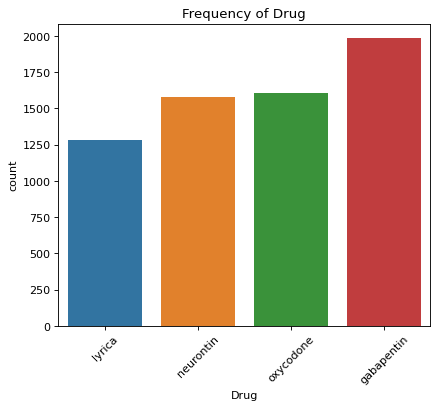

In [ ]:
plt.figure(figsize=(6,5), dpi= 80)
av=sns.countplot(x="Drug", data=df,);
av.set_xticklabels(av.get_xticklabels(), rotation=45);
av.set_title('Frequency of Drug')


In [ ]:
df_mean=df.groupby('Age').mean()
df_mean

,EaseofUse,Effectiveness,Satisfaction
Age,,,
5,5.000000,5.000000,5.000000
10,3.000000,4.000000,3.000000
15,4.750000,3.625000,3.375000
20,3.820225,3.505618,3.258427
30,4.026258,3.527352,3.236324
40,4.161359,3.537155,3.249469
50,4.126623,3.550325,3.287338
60,4.194681,3.565426,3.375532
70,4.110991,3.368534,3.134698


<Figure size 480x400 with 0 Axes>

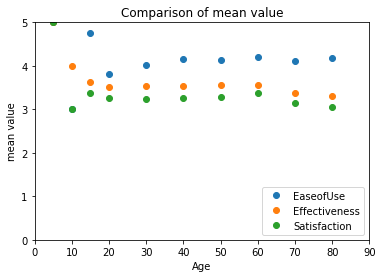

In [ ]:
plt.figure(figsize=(6,5), dpi= 80)
df_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value')
plt.legend(loc='lower right')

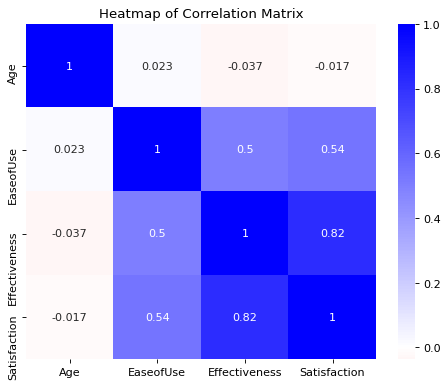

In [ ]:
#graphical representation of corellation
plt.figure(figsize=(6,5), dpi= 80)
hm=sns.heatmap(df.corr(), annot=True,center = 0,cmap='bwr_r', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()

In [ ]:
df.head(2)

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Age_group,Age_group_label
186,70,Neuropathic Pain,lyrica,5,5,5,Female,"(60, 70]",6
187,20,Neuropathic Pain,lyrica,1,3,1,Female,"(0, 20]",1


In [ ]:
# Filter dataframe by a target label
df_gab=df[df['Drug']=='gabapentin']
df_oxy=df[df['Drug']=='oxycodone']
df_neu=df[df['Drug']=='neurontin']
df_lyr=df[df['Drug']=='lyrica']
# Stratified by age_group_label of oxycodone drug:
df_oxy_grp1 = df_oxy[df_oxy['Age_group_label'] == 1] # age: <20 
df_oxy_grp2 = df_oxy[df_oxy['Age_group_label'] == 2] # age: 20-30
df_oxy_grp3 = df_oxy[df_oxy['Age_group_label'] == 3] # age: 30-40
df_oxy_grp4 = df_oxy[df_oxy['Age_group_label'] == 4] # age: 40-50
df_oxy_grp5 = df_oxy[df_oxy['Age_group_label'] == 5] # age: 50-60
df_oxy_grp6 = df_oxy[df_oxy['Age_group_label'] == 6] # age: 60-70
df_oxy_grp7 = df_oxy[df_oxy['Age_group_label'] == 7] # age: >70

# Stratified by age_group_label of neurontin drug: 
df_neu_grp1 = df_neu[df_neu['Age_group_label'] == 1] 
df_neu_grp2 = df_neu[df_neu['Age_group_label'] == 2] 
df_neu_grp3 = df_neu[df_neu['Age_group_label'] == 3] 
df_neu_grp4 = df_neu[df_neu['Age_group_label'] == 4] 
df_neu_grp5 = df_neu[df_neu['Age_group_label'] == 5] 
df_neu_grp6 = df_neu[df_neu['Age_group_label'] == 6] 
df_neu_grp7 = df_neu[df_neu['Age_group_label'] == 7] 

# Stratified by age_group_label of lyrica drug:
df_lyr_grp1 = df_lyr[df_lyr['Age_group_label'] == 1]  
df_lyr_grp2 = df_lyr[df_lyr['Age_group_label'] == 2] 
df_lyr_grp3 = df_lyr[df_lyr['Age_group_label'] == 3] 
df_lyr_grp4 = df_lyr[df_lyr['Age_group_label'] == 4] 
df_lyr_grp5 = df_lyr[df_lyr['Age_group_label'] == 5] 
df_lyr_grp6 = df_lyr[df_lyr['Age_group_label'] == 6] 
df_lyr_grp7 = df_lyr[df_lyr['Age_group_label'] == 7] 

# Age group counts index for stratification by major class "drug" %:
df_gab_counts = df_gab[['Age_group','Age_group_label']]
df_gab_counts = pd.DataFrame(df_gab_counts.groupby('Age_group_label')['Age_group'].count())
df_gab_counts.columns = ['counts']

# Compute age group label proporiton % on gabapentin drug:
df_gab_counts['Age_group_pct'] = df_gab_counts['counts']/df_gab_counts['counts'].sum()

# Print the count index for each age group from gabapentin drug:
print(df_gab_counts)

                 counts  Age_group_pct
Age_group_label                       
1                    19       0.009581
2                   100       0.050429
3                   184       0.092789
4                   498       0.251135
5                   582       0.293495
6                   453       0.228442
7                   147       0.074130


In [ ]:
# Upsampling on oxycodone drug by gabapentin drug proporition %

sampled_oxy_grp1 = resample(df_oxy_grp1, replace=True, n_samples=20,random_state=0)
sampled_oxy_grp2 = resample(df_oxy_grp2, replace=True, n_samples=100,random_state=0)
sampled_oxy_grp3 = resample(df_oxy_grp3, replace=True, n_samples=185,random_state=0)
sampled_oxy_grp4 = resample(df_oxy_grp4, replace=True, n_samples=500,random_state=0)
sampled_oxy_grp5 = resample(df_oxy_grp5, replace=True, n_samples=580,random_state=0)
sampled_oxy_grp6 = resample(df_oxy_grp6, replace=True, n_samples=455,random_state=0)
sampled_oxy_grp7 = resample(df_oxy_grp7, replace=True, n_samples=150,random_state=0)

# Concatentate upsampled minority class: "oxycodone" drug of all age groups
df_oxy_upsampled = pd.concat([sampled_oxy_grp1,sampled_oxy_grp2,sampled_oxy_grp3, sampled_oxy_grp4,sampled_oxy_grp5,sampled_oxy_grp6,
                              sampled_oxy_grp7], axis=0)

In [ ]:
# Upsampling on neurontin drug by gabapentin drug proporition %

sampled_neu_grp1 = resample(df_neu_grp1, replace=True, n_samples=20,random_state=0)
sampled_neu_grp2 = resample(df_neu_grp2, replace=True, n_samples=100,random_state=0)
sampled_neu_grp3 = resample(df_neu_grp3, replace=True, n_samples=185,random_state=0)
sampled_neu_grp4 = resample(df_neu_grp4, replace=True, n_samples=500,random_state=0)
sampled_neu_grp5 = resample(df_neu_grp5, replace=True, n_samples=580,random_state=0)
sampled_neu_grp6 = resample(df_neu_grp6, replace=True, n_samples=455,random_state=0)
sampled_neu_grp7 = resample(df_neu_grp7, replace=True, n_samples=150,random_state=0)

# Concatentate upsampled minority class: "neurontin" drug of all age groups
df_neu_upsampled = pd.concat([sampled_neu_grp1,sampled_neu_grp2,sampled_neu_grp3, sampled_neu_grp4,sampled_neu_grp5,sampled_neu_grp6,
                               sampled_neu_grp7], axis=0)

In [ ]:
# Upsampling on lyrica drug by gabapentin drug proporition %

sampled_lyr_grp1 = resample(df_lyr_grp1, replace=True, n_samples=20,random_state=0)
sampled_lyr_grp2 = resample(df_lyr_grp2, replace=True, n_samples=100,random_state=0)
sampled_lyr_grp3 = resample(df_lyr_grp3, replace=True, n_samples=185,random_state=0)
sampled_lyr_grp4 = resample(df_lyr_grp4, replace=True, n_samples=500,random_state=0)
sampled_lyr_grp5 = resample(df_lyr_grp5, replace=True, n_samples=580,random_state=0)
sampled_lyr_grp6 = resample(df_lyr_grp6, replace=True, n_samples=455,random_state=0)
sampled_lyr_grp7 = resample(df_lyr_grp7, replace=True, n_samples=150,random_state=0)

# Concatentate upsampled minority class: "lyrica" drug of all age groups
df_lyr_upsampled = pd.concat([sampled_lyr_grp1,sampled_lyr_grp2,sampled_lyr_grp3, sampled_lyr_grp4,sampled_lyr_grp5,sampled_lyr_grp6,
                              sampled_lyr_grp7], axis=0)

# Conbine upsampled minority classes: "oxycodone,neurontin,lyrica" drug with upsampled gabapentin drug
df = pd.concat([df_oxy_upsampled,df_neu_upsampled,df_lyr_upsampled,df_gab],axis=0)

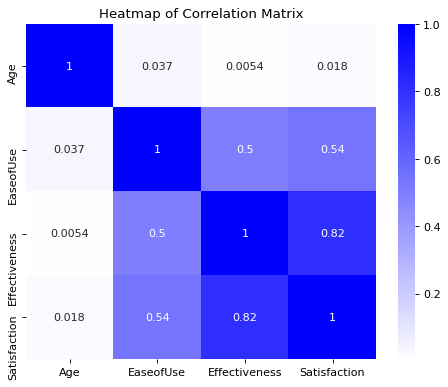

In [ ]:
#graphical representation of corellation
plt.figure(figsize=(6,5), dpi= 80)
hm=sns.heatmap(df .corr(), annot=True,center = 0,cmap='bwr_r', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()

# Statistical Test

#### Impact of EaseofUse and Satisfaction

Paired sampled t-test :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables.

Hypothesis Testing:  Is there significant difference between the patients response towards EaseofUse and Satisfaction?


##### Null  Hypothesis: 
\begin{array}{c}
H_0: \rho_{EaseofUse} = \rho_{Satisfaction}
\end{array}

The null hypothesis would be that there is no difference in patients response of EaseofUse and Satisfaction:

##### Alternate Hypothesis:  
\begin{array}{c}
H_A: \rho_{EaseofUse} \neq \rho_{Satisfaction}
\end{array}


The alternative hypothesis would be that there is a difference in patients response of EaseofUse and Satisfaction.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

In [ ]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_ind(df['EaseofUse'], df['Satisfaction'])
print(ttest,pval)
if pval < 0.05:
    print("fail to accepet null hypothesis")
else:
    print("accept null hypothesis")

40.6586087199659 0.0
fail to accepet null hypothesis


#### Impact of Effectiveness and Satisfaction

Hypothesis Testing:  Is there significant difference between the patients response towards Effectiveness and Satisfaction?


##### Null  Hypothesis: 
\begin{array}{c}
H_0: \rho_{Effectiveness} = \rho_{Satisfaction}
\end{array}

The null hypothesis would be that there is no difference in patients response of Effectiveness and Satisfaction:

##### Alternate Hypothesis:  
\begin{array}{c}
H_A: \rho_{Effectiveness} \neq \rho_{Satisfaction}
\end{array}

The alternative hypothesis would be that there is a difference in patients response of Effectiveness and Satisfaction.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

In [ ]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_ind(df['Effectiveness'], df['Satisfaction'])
print(ttest,pval)
if pval < 0.05:
    print("fail to accept null hypothesis")
else:
    print("accept null hypothesis")

11.317109888665783 1.4009999799830085e-29
fail to accept null hypothesis


#### Impact of EaseofUse and Effectiveness

Hypothesis Testing:  Is there significant difference between the patients response towards EaseofUse and Effectiveness?


##### Null  Hypothesis: 
\begin{array}{c}
H_0: \rho_{EaseofUse} = \rho_{Effectiveness}
\end{array}

The null hypothesis would be that there is no difference in patients response of EaseofUse and Effectiveness:

##### Alternate Hypothesis:  
\begin{array}{c}
H_A: \rho_{EaseofUse} \neq \rho_{Effectiveness}
\end{array}

The alternative hypothesis would be that there is a difference in patients response of EaseofUse and Effectiveness.

In oder to test this hypothesis, we conducted t-test using ttest_ind()

In [ ]:
from scipy.stats import ttest_ind
from scipy import stats
ttest,pval = stats.ttest_ind(df['EaseofUse'], df['Effectiveness'])
print(ttest,pval)
if pval < 0.05:
    print("fail to accept null hypothesis")
else:
    print("accept null hypothesis")

30.797822502772792 2.334344815019319e-202
fail to accept null hypothesis


# **MACHINE LEARNING MODELING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Perform dummy variable encoding on nominal features #
# Drop first dummy variable to avoid dummy variable trap on each converted feature!
df2 = pd.get_dummies(df[['Age','EaseofUse','Effectiveness','Satisfaction','Sex']], drop_first=True)

# Concatenated with a Drug label on transformed dataframe: 
df = pd.concat([df2, df['Drug']], axis=1)


In [ ]:
#Split train and test
X=df.drop('Drug', axis=1)
y=df['Drug']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
print(y.shape, X.shape)

(7953,) (7953, 5)


In [ ]:
def prepare_targets(y_train,y_test):
    enc=LabelEncoder()
    enc.fit(y_train)
    y_train_enc = enc.transform(y_train)
    y_test_enc = enc.transform(y_test)
    return y_train_enc,y_test_enc

In [ ]:
# prepare output dat
y_train  = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)
y_test_enc = lab_enc.fit_transform(y_test)

 1) Satisfaction                   0.387042
 2) Sex_Male                       0.319104
 3) EaseofUse                      0.119767
 4) Effectiveness                  0.102680
 5) Age                            0.071406


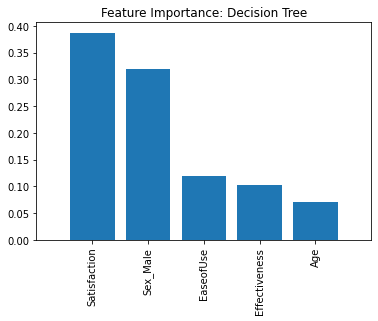

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',  max_depth=4,   random_state=0)
tree.fit(X_train, y_train_enc)
y_tree_pred = tree.predict(X_test)
tree_pred_y = lab_enc.fit_transform(y_tree_pred)
feat_labels = df.columns[:-1]
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance: Decision Tree')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()

 1) Age                            0.346846
 2) EaseofUse                      0.221183
 3) Effectiveness                  0.189950
 4) Satisfaction                   0.179096
 5) Sex_Male                       0.062925


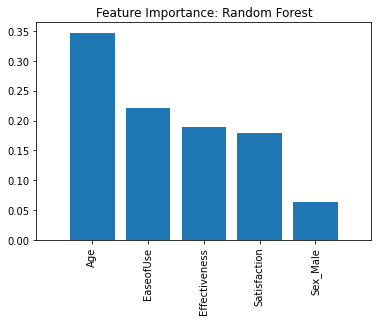

In [ ]:
# Feature Selection: 
# Using a Random Forest:
rf = RandomForestClassifier()
rf.fit(X_train, y_train_enc)
y_rf_pred = rf.predict(X_test);
rf_pred_y = lab_enc.fit_transform(y_rf_pred)
feat_labels = df.columns[:-1]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Random Forest')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()

 1) Satisfaction                   0.303005
 2) Sex_Male                       0.187140
 3) Age                            0.184749
 4) Effectiveness                  0.166186
 5) EaseofUse                      0.158920


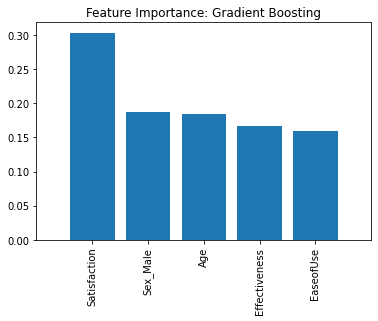

In [ ]:
# Feature Selection: 
# Using a Gradient Boosting Classifier:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train_enc)
y_gbc_pred = gbc.predict(X_test)
gb_pred_y = lab_enc.fit_transform(y_gbc_pred)
feat_labels = df.columns[:-1]
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Gradient Boosting')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()


 1) Sex_Male                       0.369003
 2) Satisfaction                   0.266251
 3) Effectiveness                  0.158243
 4) EaseofUse                      0.114084
 5) Age                            0.092420


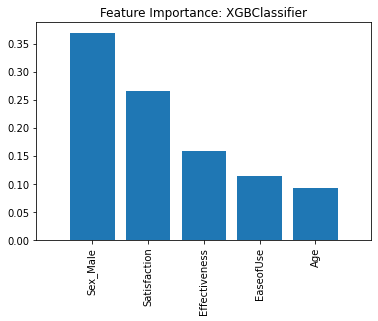

In [ ]:
# Feature Selection:  Using a XGBClassifier:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train_enc)
y_xgbc_pred = xgbc.predict(X_test)
xgb_pred_y = lab_enc.fit_transform(y_xgbc_pred)
feat_labels = df.columns[:-1]
importances = xgbc.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: XGBClassifier')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()


 1) Age                            0.389829
 2) EaseofUse                      0.212613
 3) Effectiveness                  0.175526
 4) Satisfaction                   0.164156
 5) Sex_Male                       0.057876


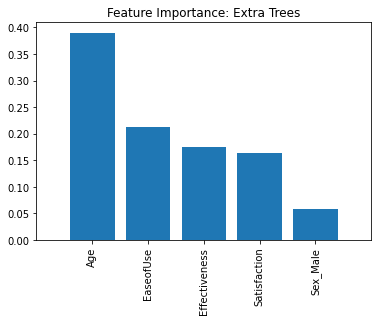

In [ ]:
# Feature Selection: Using a Extra Trees Classifier:
ext = ExtraTreesClassifier()
ext.fit(X_train, y_train_enc)
y_ext_pred = ext.predict(X_test)
ex_pred_y = lab_enc.fit_transform(y_ext_pred)
feat_labels = df.columns[:-1]
importances = ext.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Extra Trees')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.show()


In [ ]:
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return roc_auc_score(y_test,y_pred,average=average)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_enc)
y_knn_pred = knn.predict(X_test)
kn_pred_y = lab_enc.fit_transform(y_knn_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=kn_pred_y)
print('KNeighborsClassifier Result')
print(sk_report)
print('roc_auc_score of KNeighborsClassifier is: '+str(multiclass_roc_auc_score(y_test_enc, kn_pred_y)))

KNeighborsClassifier Result
              precision    recall  f1-score   support

           0      0.330     0.489     0.394       485
           1      0.358     0.374     0.366       462
           2      0.533     0.342     0.417       520
           3      0.491     0.427     0.457       522

    accuracy                          0.408      1989
   macro avg      0.428     0.408     0.408      1989
weighted avg      0.432     0.408     0.410      1989

roc_auc_score of KNeighborsClassifier is: 0.6057680312856677


In [ ]:
bag =  BaggingClassifier()
bag.fit(X_train, y_train_enc)
y_bag_pred = bag.predict(X_test)
ba_pred_y = lab_enc.fit_transform(y_bag_pred)
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=ba_pred_y)
print('BaggingClassifier Result')
print(sk_report)
print('roc_auc_score of BaggingClassifier is: '+str(multiclass_roc_auc_score(y_test_enc, ba_pred_y)))

BaggingClassifier Result
              precision    recall  f1-score   support

           0      0.455     0.402     0.427       485
           1      0.471     0.370     0.415       462
           2      0.522     0.471     0.495       520
           3      0.507     0.707     0.590       522

    accuracy                          0.493      1989
   macro avg      0.489     0.488     0.482      1989
weighted avg      0.490     0.493     0.485      1989

roc_auc_score of BaggingClassifier is: 0.6589648106732149


# Evaluation of Model using Confusion Matrix

In [ ]:
#Confussion matrix plotting function
def plot_cm (cm, classes):
    fig, ax = plt.subplots(figsize=(10,10))
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')   
    
class_labels=np.array(['gabapentin','oxycodone','neurontin','lyrica'],dtype=str)

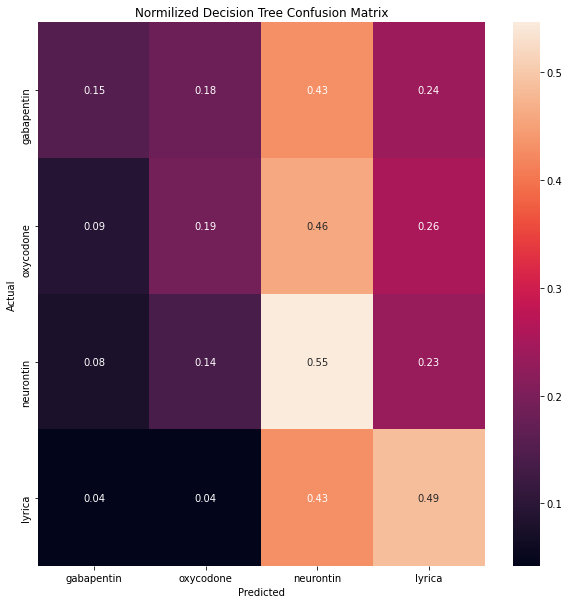

Decision Tree Result
              precision    recall  f1-score   support

  gabapentin      0.411     0.153     0.223       485
   oxycodone      0.325     0.190     0.240       462
   neurontin      0.306     0.546     0.392       520
      lyrica      0.417     0.487     0.449       522

    accuracy                          0.352      1989
   macro avg      0.365     0.344     0.326      1989
weighted avg      0.365     0.352     0.330      1989

ROC score of Decision Tree is 0.56


In [ ]:
# Confusion matrix of Decision Tree
cm=confusion_matrix(y_test_enc, tree_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Decision Tree Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=tree_pred_y,target_names=class_labels)
print('Decision Tree Result')
print(sk_report)
print('ROC score of Decision Tree is %0.2f'% (multiclass_roc_auc_score(y_test_enc, tree_pred_y)))


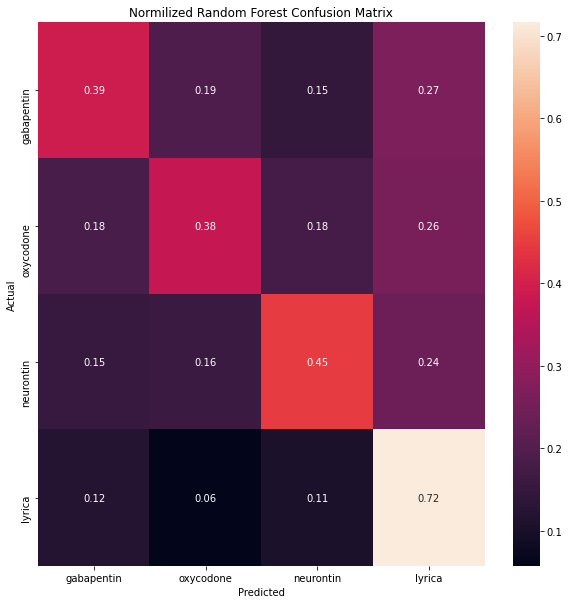

Random Forest Result
              precision    recall  f1-score   support

  gabapentin      0.455     0.392     0.421       485
   oxycodone      0.458     0.379     0.415       462
   neurontin      0.528     0.448     0.485       520
      lyrica      0.500     0.716     0.589       522

    accuracy                          0.489      1989
   macro avg      0.485     0.484     0.477      1989
weighted avg      0.487     0.489     0.480      1989

ROC score of Random Forest is 0.66


In [ ]:
# Confusion matrix of Random Forest
cm=confusion_matrix(y_test_enc, rf_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Random Forest Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=rf_pred_y,target_names=class_labels)
print('Random Forest Result')
print(sk_report)
print('ROC score of Random Forest is %0.2f'% (multiclass_roc_auc_score(y_test_enc, rf_pred_y)))


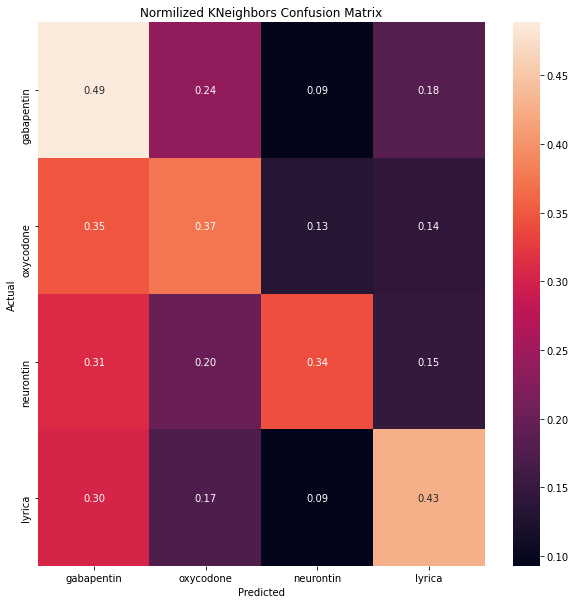

KNeighbors Result
              precision    recall  f1-score   support

  gabapentin      0.330     0.489     0.394       485
   oxycodone      0.358     0.374     0.366       462
   neurontin      0.533     0.342     0.417       520
      lyrica      0.491     0.427     0.457       522

    accuracy                          0.408      1989
   macro avg      0.428     0.408     0.408      1989
weighted avg      0.432     0.408     0.410      1989

ROC score of KNeighbors is 0.61


In [ ]:
 # Confusion matrix of KNeighbors
cm=confusion_matrix(y_test_enc, kn_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized KNeighbors Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=kn_pred_y,target_names=class_labels)
print('KNeighbors Result')
print(sk_report)
print('ROC score of KNeighbors is %0.2f'% (multiclass_roc_auc_score(y_test_enc, kn_pred_y)))


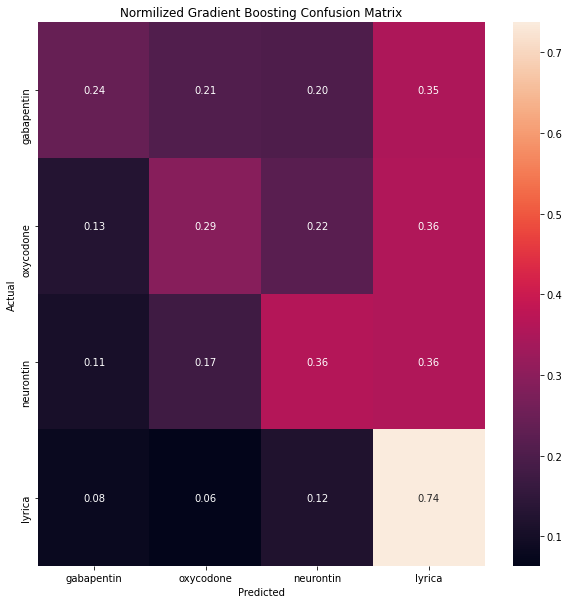

Gradient Boosting Result
              precision    recall  f1-score   support

  gabapentin      0.427     0.241     0.308       485
   oxycodone      0.378     0.294     0.331       462
   neurontin      0.418     0.362     0.388       520
      lyrica      0.425     0.738     0.540       522

    accuracy                          0.415      1989
   macro avg      0.412     0.409     0.392      1989
weighted avg      0.413     0.415     0.395      1989

ROC score of Gradient Boosting is 0.61


In [ ]:
# Confusion matrix of Gradient Boosting
cm=confusion_matrix(y_test_enc, gb_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized Gradient Boosting Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=gb_pred_y,target_names=class_labels)
print('Gradient Boosting Result')
print(sk_report)
print('ROC score of Gradient Boosting is %0.2f'% (multiclass_roc_auc_score(y_test_enc, gb_pred_y)))


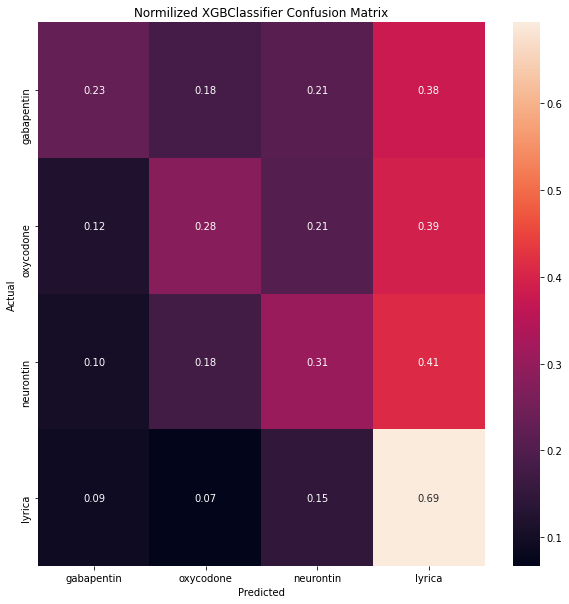

XGBClassifier Result
              precision    recall  f1-score   support

  gabapentin      0.417     0.229     0.296       485
   oxycodone      0.376     0.281     0.322       462
   neurontin      0.368     0.308     0.335       520
      lyrica      0.384     0.693     0.495       522

    accuracy                          0.384      1989
   macro avg      0.386     0.378     0.362      1989
weighted avg      0.386     0.384     0.364      1989

ROC score of XGBClassifier is 0.59


In [ ]:
# Confusion matrix of XGBClassifier
cm=confusion_matrix(y_test_enc, xgb_pred_y)
plot_cm(cm, class_labels)
plt.title('Normilized XGBClassifier Confusion Matrix')
plt.show()
sk_report = classification_report(
    digits=3, y_true=y_test_enc, y_pred=xgb_pred_y,target_names=class_labels)
print('XGBClassifier Result')
print(sk_report)
print('ROC score of XGBClassifier is %0.2f'% (multiclass_roc_auc_score(y_test_enc, xgb_pred_y)))


#Ensemble Learning: Majority Vote Classifier

In [ ]:
from sklearn.base import BaseEstimator

# Model Evaluation: precision-recall curve

# Practical Utilization of Model

After modeling

In [ ]:
# First gather the data I need and choose the display colors
condition = list(df['Condition'].unique().tolist());
sex = list(df['Sex'].unique().tolist());
age = list(df['Age'].unique().tolist());
drug=list(df['Drug'].unique().tolist());

EaseofUse = list(df['EaseofUse'].unique().tolist());
Effectiveness = list(df['Effectiveness'].unique().tolist());
Satisfaction = list(df['Satisfaction'].unique().tolist());
color1 = 'red'
color2 = 'blue'
color3 = 'black'

# This creates the initial figure.
# Note that px.scatter generates multiple scatter plot 'traces'. Each trace contains 
# the data points associated with 1 team/season/player depending on what the property
# of 'color' is set to.
trace1 = px.bar(df, x='drug', y='values' color='rate')
fig = go.FigureWidget(trace1)

# Create all our drop down widgets
filterDrop = widgets.Dropdown(
    description='Filter:',
    value='Condition',
    options=['Sex', 'Age','Drug']  
)
conditionDrop1 = widgets.Dropdown(
    description='Condition:',
    value='Pain',
    options=list(df['Condition'].unique().tolist())  

sexDrop1 = widgets.Dropdown(
    description='Sex',
    value='Male',
    options=list(df['Sex'].unique().tolist())  
)

ageDrop1 = widgets.Dropdown(
    description='AgeGroup:',
    value='0-5',
    options=list(df['Age'].unique().tolist())  
)


drugDrop1 = widgets.Dropdown(
    description='SelectDrug:',
    value='tramadol',
    options=list(df['Drug'].unique().tolist())  
)


# This will be called when the filter dropdown changes. 
def filterResponse(change):
    # generate the new traces that are filtered by teamname, season, or player
    tempTrace = px.bar(df, color=filterDrop.value)
    with fig.batch_update():
        # Delete the old traces and add the new traces in one at a time
        fig.data = []
        for tr in tempTrace.data:
            fig.add_scatter(x = tr.x, y = tr.y, hoverlabel = tr.hoverlabel, hovertemplate = tr.hovertemplate, \
                           legendgroup = tr.legendgroup, marker = tr.marker, mode = tr.mode, name = tr.name)
    # Call response so that it will color the markers appropriately
    response(change)

# Write dropdown function
